In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

Make a transfer function (lambda)

Make a weighting function

Make a delta

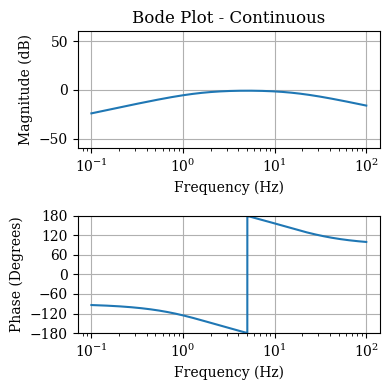

In [2]:
# Example frequency range (logarithmic scale)
frequencies = np.logspace(-1, 2, 10000)  # Frequencies from 10 to 1000 Hz

# Example transfer function H(s) = 1 / (s + 1) evaluated at jw (jω)
# H(jω) = 1 / (jω + 1)
# s = jw where w = 2 * pi * f
s = 1j * 2 * np.pi * frequencies  # jω = j * 2π * frequency

# Calculate the transfer function response
P = -s*(1/10)/((1/100)*s+1)/((1/10)*s+1)
W_2 = 0.21*s/(0.1*s + 1)
delta = 1/np.cos(s/1e3)
P_tilde = (1+delta*W_2)*P
P_env = (1+W_2)*P 

# Calculate magnitude and phase
magnitude = np.abs(P)
phase = np.angle(P)

magnitude_2 = np.abs(P_tilde)
phase_2 = np.angle(P_tilde)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, 20 * np.log10(magnitude))  # Plot magnitude in dB
ax1.set_title('Bode Plot - Continuous')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_ylim([-60,60])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, np.degrees(phase))  # Plot phase in degrees
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (Degrees)')
ax2.set_ylim([-180,180])
ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('nom_cont.png')

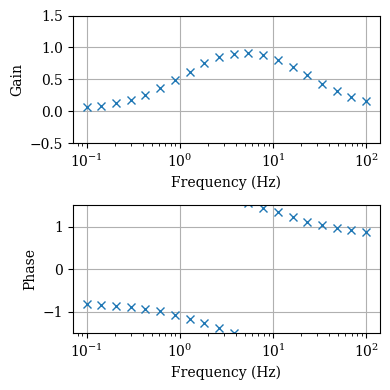

In [10]:
# Example frequency range (logarithmic scale)
frequencies = np.logspace(-1, 2, 20)  # Frequencies from 10 to 1000 Hz

# Example transfer function H(s) = 1 / (s + 1) evaluated at jw (jω)
# H(jω) = 1 / (jω + 1)
# s = jw where w = 2 * pi * f
s = 1j * 2 * np.pi * frequencies  # jω = j * 2π * frequency

# Calculate the transfer function response
P = -s*(1/10)/((1/100)*s+1)/((1/10)*s+1)
W_2 = 0.21*s/(0.1*s + 1)
delta = 1/np.cos(s/1e3)
P_tilde = (1+delta*W_2)*P
P_env = (1+W_2)*P 

# Calculate magnitude and phase
magnitude = np.abs(P)
phase = np.angle(P)

magnitude_2 = np.abs(P_tilde)
phase_2 = np.angle(P_tilde)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, magnitude, 'x')  # Plot magnitude in dB
ax1.set_ylabel('Gain')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylim([-0.5,1.5])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, phase/2, 'x')  # Plot phase in degrees
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylim([-1.5, 1.5])
#ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('nom_dis.png')
ax1.set_title('Bode Plot - Discretized')
fig.savefig('nom_dis_labeled.png')

In [11]:
print(magnitude, phase/2)

[0.06270696 0.0900099  0.12891192 0.18379078 0.25967539 0.36060425
 0.48559287 0.62301098 0.75012556 0.84460884 0.89698469 0.90811321
 0.87900145 0.80767598 0.69664593 0.56179549 0.42761927 0.31261995
 0.22310444 0.15715682] [-0.8199144  -0.83498485 -0.85653951 -0.88718468 -0.93023678 -0.98933846
 -1.06715042 -1.16291424 -1.27062149 -1.38134313 -1.48910635  1.54760516
  1.44179513  1.33236964  1.2219375   1.11848039  1.03025951  0.96092209
  0.90937199  0.87227083]


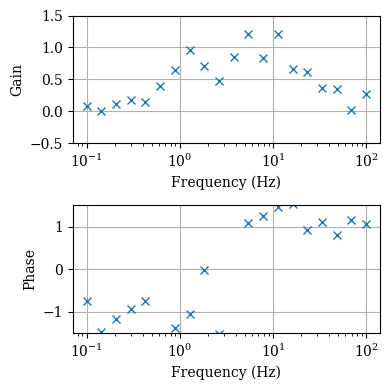

In [4]:
# Calculate magnitude and phase
magnitude = np.abs(P)
phase = np.angle(P)

beta = 0.5
noise = np.random.normal(scale = beta, size = 20)
magnitude_2 = np.abs(np.abs(P) + np.abs(P)*np.random.normal(scale = beta, size = 20))
phase_2 = np.angle(P)*np.random.normal(scale = beta, size = 20)+np.angle(P)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, magnitude_2, 'x')  # Plot magnitude in dB
ax1.set_ylabel('Gain')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylim([-0.5,1.5])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, phase_2/2, 'x')  # Plot phase in degrees
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylim([-1.5, 1.5])
#ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('nom_dis_1.png')

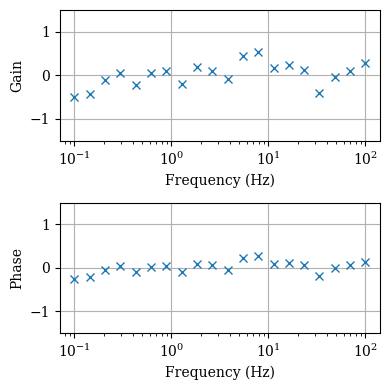

In [5]:
beta = 0.25
noise = np.random.normal(scale = beta, size = 20)
magnitude_3 = noise 
phase_3 = noise 

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, magnitude_3, 'x')  # Plot magnitude in dB
ax1.set_ylabel('Gain')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylim([-1.5,1.5])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, phase_3/2, 'x')  # Plot phase in degrees
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylim([-1.5, 1.5])
#ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('nom_dis_2.png')

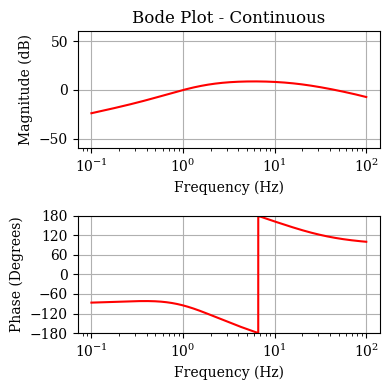

In [6]:
# Example frequency range (logarithmic scale)
frequencies = np.logspace(-1, 2, 10000)  # Frequencies from 10 to 1000 Hz

# Example transfer function H(s) = 1 / (s + 1) evaluated at jw (jω)
# H(jω) = 1 / (jω + 1)
# s = jw where w = 2 * pi * f
s = 1j * 2 * np.pi * frequencies  # jω = j * 2π * frequency

# Calculate the transfer function response
P = -s*(1/10)/((1/100)*s+1)/((1/10)*s+1)
W_2 = 0.21*s/(0.1*s + 1)
delta = 1/np.cos(s/1e3)
P_tilde = (1+delta*W_2)*P
P_env = (1+W_2)*P 

# Calculate magnitude and phase
magnitude = np.abs(P)
phase = np.angle(P)

magnitude_2 = np.abs(P_tilde)
phase_2 = np.angle(P_tilde)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, 20 * np.log10(magnitude_2), '-r')  # Plot magnitude in dB
ax1.set_title('Bode Plot - Continuous')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_ylim([-60,60])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, np.degrees(phase_2), '-r')  # Plot phase in degrees
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (Degrees)')
ax2.set_ylim([-180,180])
ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('per_cont.png')

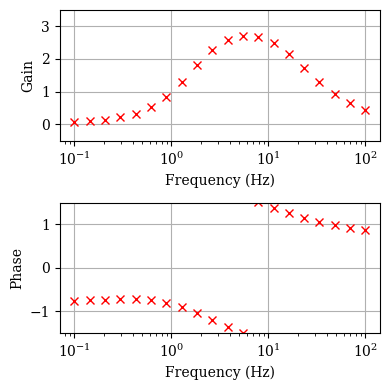

In [7]:
# Example frequency range (logarithmic scale)
frequencies = np.logspace(-1, 2, 20)  # Frequencies from 10 to 1000 Hz

# Example transfer function H(s) = 1 / (s + 1) evaluated at jw (jω)
# H(jω) = 1 / (jω + 1)
# s = jw where w = 2 * pi * f
s = 1j * 2 * np.pi * frequencies  # jω = j * 2π * frequency

# Calculate the transfer function response
P = -s*(1/10)/((1/100)*s+1)/((1/10)*s+1)
W_2 = 0.21*s/(0.1*s + 1)
delta = 1/np.cos(s/1e3)
P_tilde = (1+delta*W_2)*P
P_env = (1+W_2)*P 

# Calculate magnitude and phase
magnitude = np.abs(P_tilde)
phase = np.angle(P_tilde)

magnitude_2 = np.abs(P_tilde)
phase_2 = np.angle(P_tilde)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, magnitude, 'xr')  # Plot magnitude in dB
ax1.set_ylabel('Gain')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylim([-0.5,3.5])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, phase/2, 'xr')  # Plot phase in degrees
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylim([-1.5, 1.5])
#ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('per_dis.png')

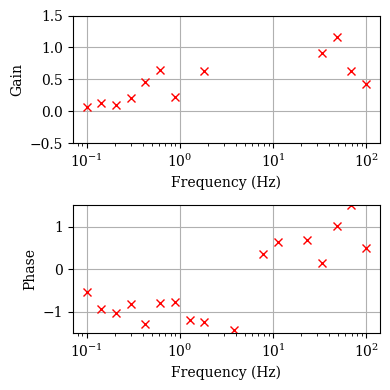

In [8]:
# Calculate magnitude and phase
magnitude = np.abs(P)
phase = np.angle(P)

beta = 0.5
noise = np.random.normal(scale = beta, size = 20)
magnitude_2 = np.abs(np.abs(P_tilde) + np.abs(P_tilde)*np.random.normal(scale = beta, size = 20))
phase_2 = np.angle(P_tilde)*np.random.normal(scale = beta, size = 20)+np.angle(P_tilde)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, magnitude_2, 'xr')  # Plot magnitude in dB
ax1.set_ylabel('Gain')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylim([-0.5,1.5])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, phase_2/2, 'xr')  # Plot phase in degrees
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylim([-1.5, 1.5])
#ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('per_dis_1.png')

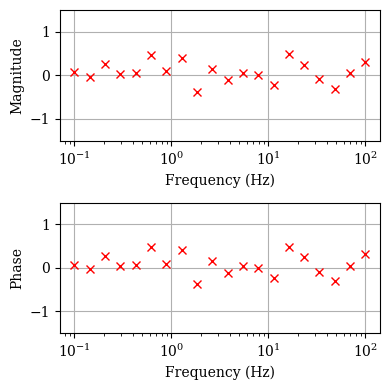

In [9]:
beta = 0.25
noise = np.random.normal(scale = beta, size = 20)
magnitude_3 = noise
phase_3 = noise 

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# Magnitude plot
ax1.semilogx(frequencies, magnitude_3, 'rx')  # Plot magnitude in dB
ax1.set_ylabel('Magnitude')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylim([-1.5,1.5])
ax1.grid(True)

# Phase plot
ax2.semilogx(frequencies, phase_3, 'rx')  # Plot phase in degrees
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylim([-1.5, 1.5])
#ax2.set_yticks(np.arange(180,-181,-60))
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
fig.savefig('per_dis_2.png')